In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
from matplotlib.dates import DateFormatter



In [2]:
df = pd.read_csv('/content/nvidia.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2023-01-03,14.851,14.996,14.096,14.315,401277000,14.305581
1,2023-01-04,14.567,14.853,14.241,14.749,431324000,14.739295
2,2023-01-05,14.491,14.564,14.148,14.265,389168000,14.255614
3,2023-01-06,14.474,15.010,14.034,14.859,405044000,14.849225
4,2023-01-09,15.284,16.056,15.141,15.628,504231000,15.617719


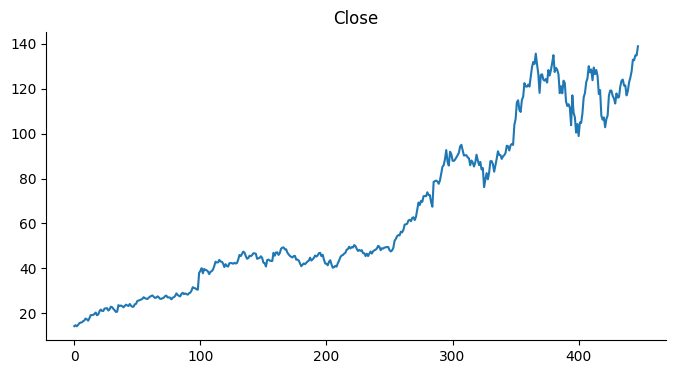

In [4]:
# @title Close

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
443,2024-10-08,130.259995,133.479996,129.419998,132.889999,285722500,132.889999
444,2024-10-09,134.110001,134.520004,131.380005,132.649994,246191600,132.649994
445,2024-10-10,131.910004,135.000000,131.000000,134.809998,242311300,134.809998
446,2024-10-11,134.009995,135.779999,133.660004,134.800003,169732000,134.800003
447,2024-10-14,136.429993,139.600006,136.300003,138.850601,190441107,138.850601


***Data Overview & summary***

In [6]:
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing Values in each column:")
print(df.isnull().sum())


Summary statistics of the dataset:
             Open        High         Low       Close        Volume  \
count  448.000000  448.000000  448.000000  448.000000  4.480000e+02   
mean    64.193085   65.402489   62.910025   64.237370  4.504371e+08   
std     35.880173   36.613675   34.981482   35.825875  1.596547e+08   
min     14.474000   14.564000   14.034000   14.265000  1.697320e+08   
25%     40.477000   41.179751   39.845001   40.456500  3.547021e+08   
50%     48.164499   48.571501   47.447500   48.043001  4.246520e+08   
75%     91.065750   92.465750   89.209751   91.375751  5.124520e+08   
max    139.800003  140.759995  136.300003  138.850601  1.543911e+09   

        Adj Close  
count  448.000000  
mean    64.224244  
std     35.827486  
min     14.255614  
25%     40.444264  
50%     48.032696  
75%     91.360435  
max    138.850601  

Missing Values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: 

In [7]:
df.describe()


,Open,High,Low,Close,Volume,Adj Close
count,448.000000,448.000000,448.000000,448.000000,4.480000e+02,448.000000
mean,64.193085,65.402489,62.910025,64.237370,4.504371e+08,64.224244
std,35.880173,36.613675,34.981482,35.825875,1.596547e+08,35.827486
min,14.474000,14.564000,14.034000,14.265000,1.697320e+08,14.255614
25%,40.477000,41.179751,39.845001,40.456500,3.547021e+08,40.444264
50%,48.164499,48.571501,47.447500,48.043001,4.246520e+08,48.032696
75%,91.065750,92.465750,89.209751,91.375751,5.124520e+08,91.360435
max,139.800003,140.759995,136.300003,138.850601,1.543911e+09,138.850601


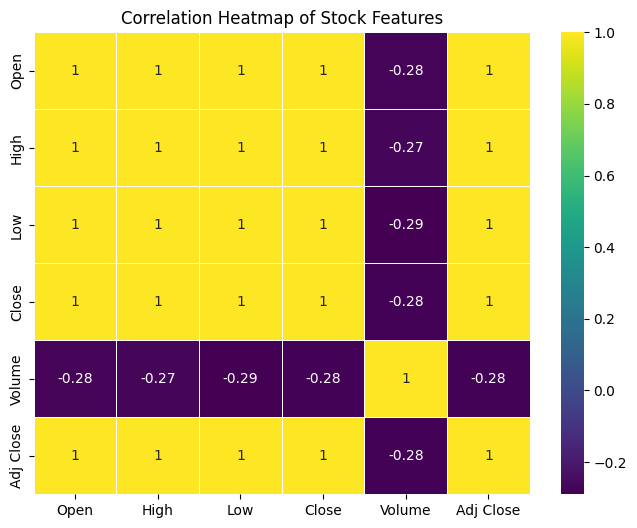

In [8]:
# Plot Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Exclude the 'Date' column from the correlation calculation
correlation_matrix = df.drop(columns=['Date']).corr()  # Exclude 'Date' column
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Features')
plt.show()

Time-Series Analysis

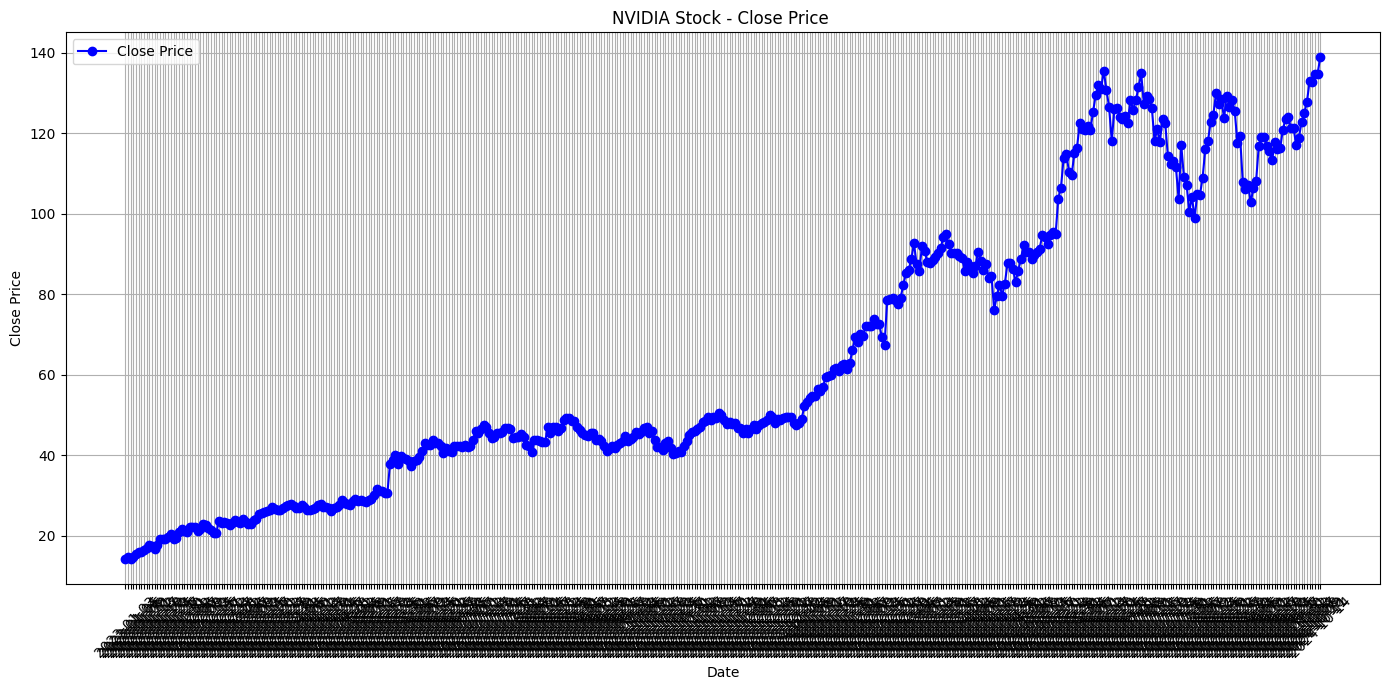

In [9]:
plt.figure(figsize=(14, 7))

# Style 1: Line plot with markers
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', marker='o', linestyle='-')
plt.title('NVIDIA Stock - Close Price ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Volume Analysis Over Time

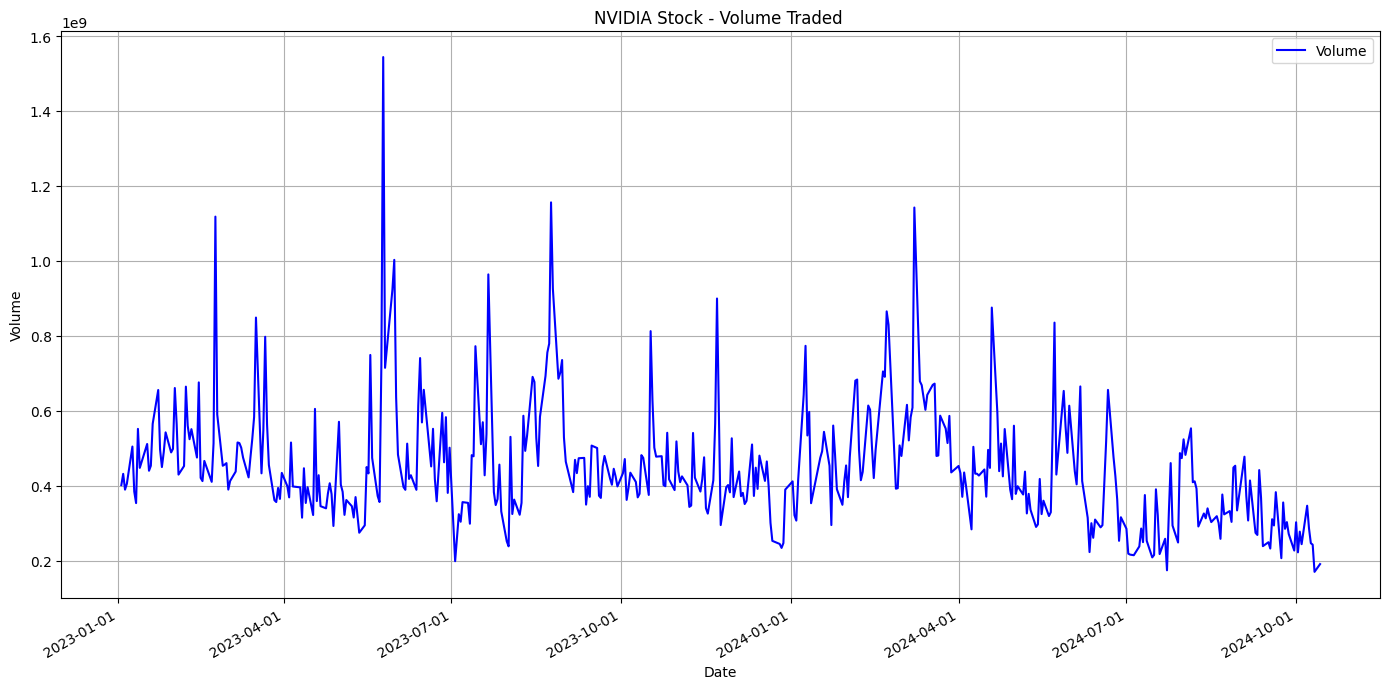

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 7))

# Plot the data
plt.plot(df['Date'], df['Volume'], label='Volume', color='blue')

plt.title('NVIDIA Stock - Volume Traded ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

plt.tight_layout()
plt.show()

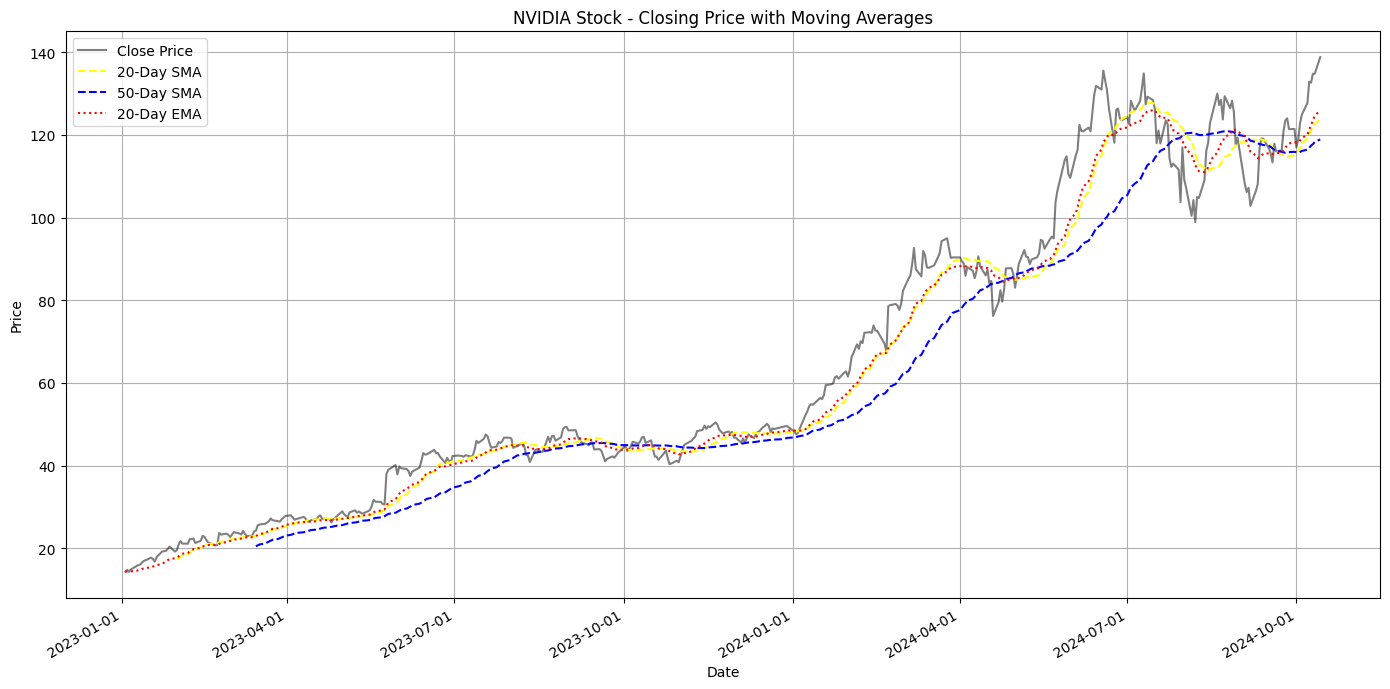

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming your data is in a DataFrame called 'df'
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Plot Close Price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='yellow', linestyle='--')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA', color='blue', linestyle='--')
plt.plot(df['Date'], df['EMA_20'], label='20-Day EMA', color='red', linestyle=':')

plt.title('NVIDIA Stock - Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

plt.tight_layout()
plt.show()

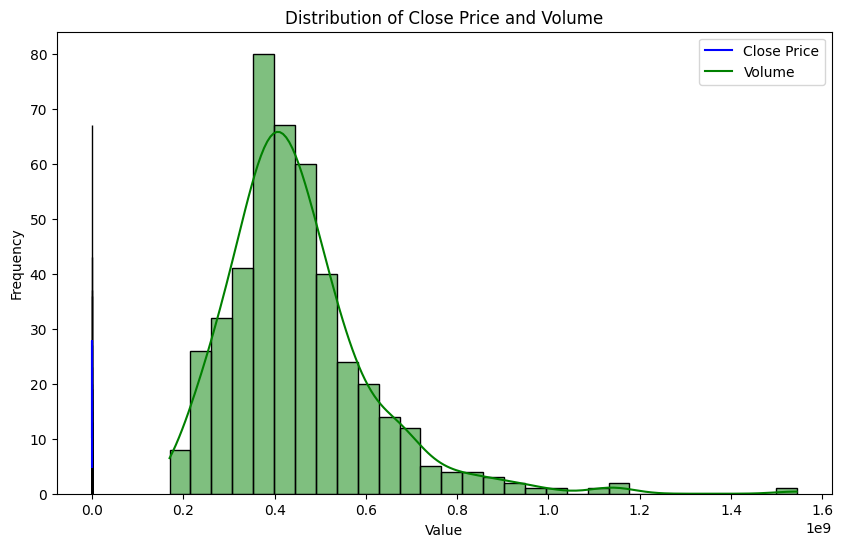

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Close', bins=30, kde=True, color='blue', alpha=0.5)
sns.histplot(data=df, x='Volume', bins=30, kde=True, color='green', alpha=0.5)
plt.title('Distribution of Close Price and Volume')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['Close Price', 'Volume'])
plt.show()

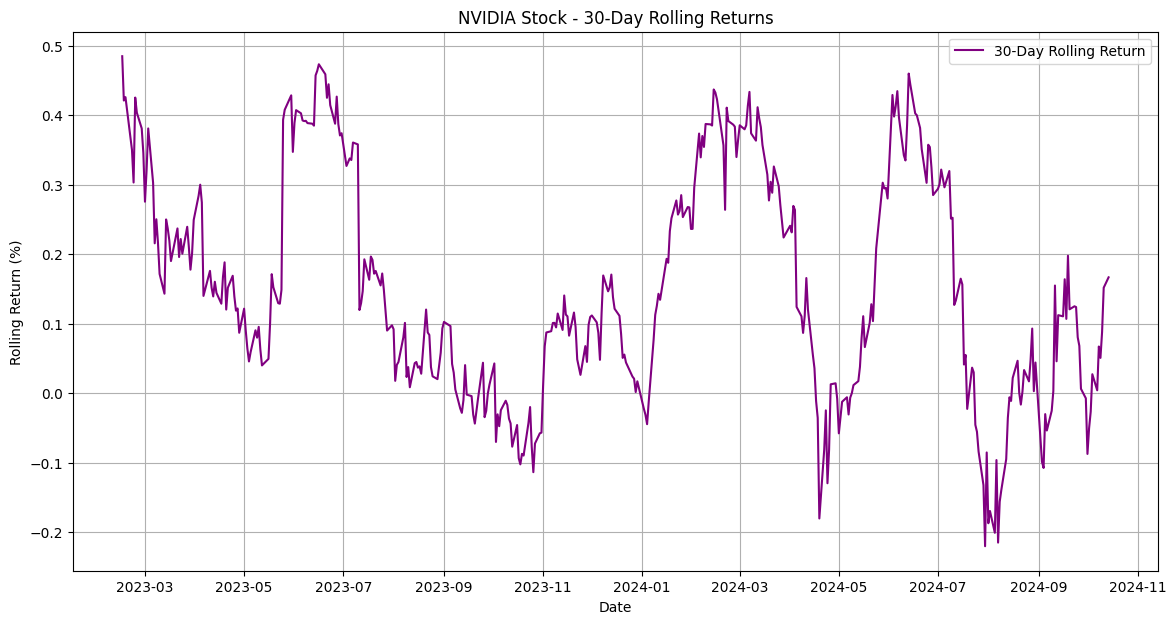

In [13]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Calculate rolling returns (e.g., 30-day rolling returns)
df['Rolling_Return_30'] = df['Close'].pct_change().rolling(window=30).sum()

# Plot rolling returns
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Rolling_Return_30'], label='30-Day Rolling Return', color='purple')
plt.title('NVIDIA Stock - 30-Day Rolling Returns')
plt.xlabel('Date')
plt.ylabel('Rolling Return (%)')
plt.legend()
plt.grid(True)

# Format

Linear Regression - Mean Squared Error: 22.905892525484212


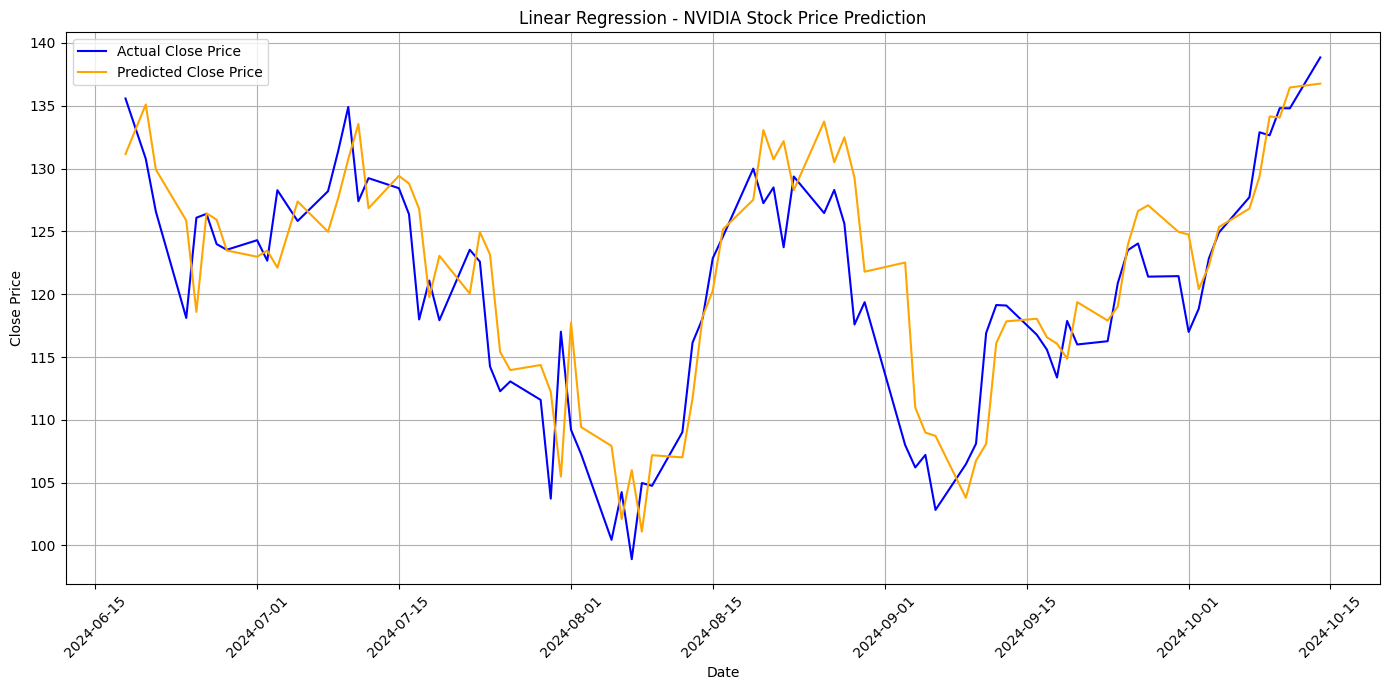

Random Forest - Mean Squared Error: 85.26878853576235


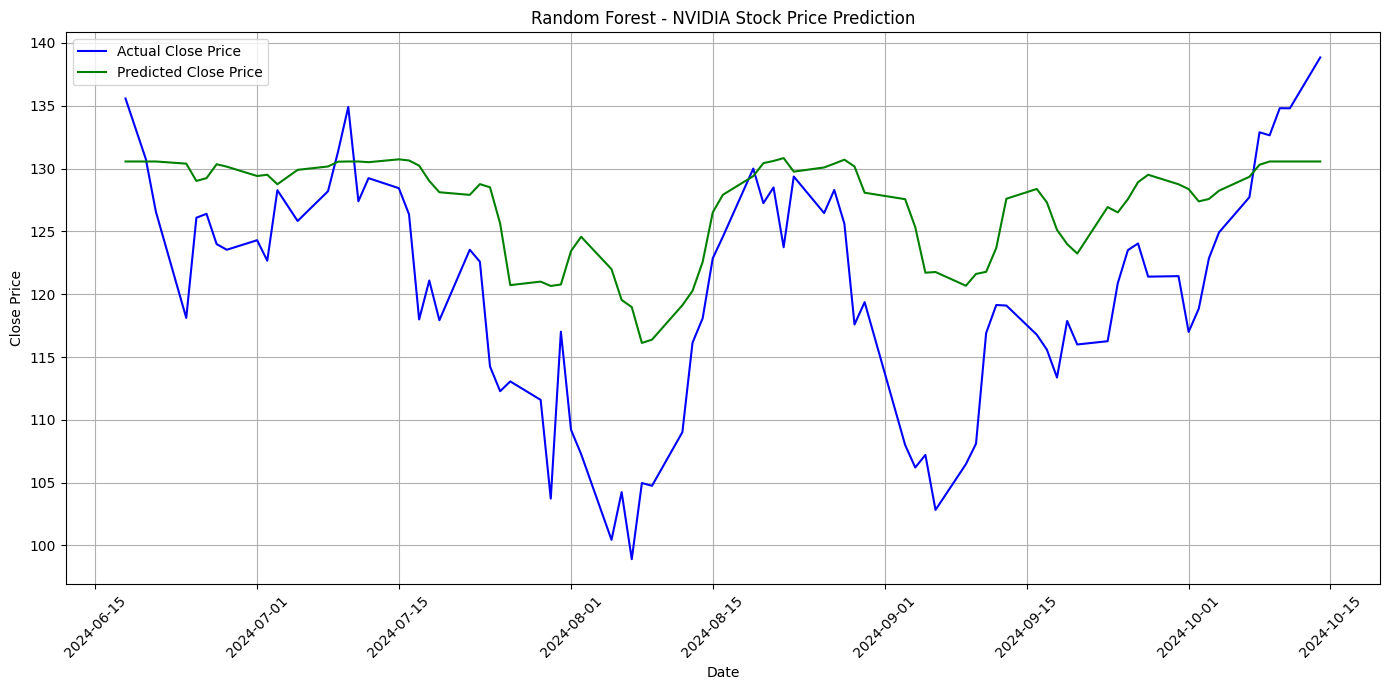

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Create lag features and rolling averages (useful for prediction)
df['Lag_1'] = df['Close'].shift(1)  # Previous day's close
df['Lag_2'] = df['Close'].shift(2)  # 2 days ago close
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # 20-day Simple Moving Average
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Drop rows with NaN values due to the creation of lag features and moving averages
df.dropna(inplace=True)

# Feature columns
features = ['Lag_1', 'Lag_2', 'SMA_20', 'EMA_20']
X = df[features]
y = df['Close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale testing data

# --- Linear Regression Model ---
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}")

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='orange')
plt.title('Linear Regression - NVIDIA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Random Forest Model ---
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_rf_pred)
print(f"Random Forest - Mean Squared Error: {rf_mse}")

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_rf_pred, label='Predicted Close Price', color='green')
plt.title('Random Forest - NVIDIA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion
The Linear Regression model is better suited for this task given its superior performance with the existing features.